In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [188]:
csv_in='mid-p1.csv'
df=pd.read_csv(csv_in, skiprows=4, header=0)
print(df.shape)
print(df.info())
display(df.head())

(108, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   d1      108 non-null    float64
 1   d2      108 non-null    int64  
 2   d3      108 non-null    object 
 3   d4      108 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.5+ KB
None


,d1,d2,d3,d4
0,1.75,22,S,j
1,-0.29,0,D,t
2,-0.48,19,S,p
3,-2.65,19,S,p
4,-0.01,20,D,e


108

In [189]:
print(df['d1'].head())
print(type(df['d1']))

0    1.75
1   -0.29
2   -0.48
3   -2.65
4   -0.01
Name: d1, dtype: float64
<class 'pandas.core.series.Series'>


In [190]:
print(df['d1'].min())

-2.65


In [191]:
display(df.sort_values(by='d2', ascending=False).head())

,d1,d2,d3,d4
0,1.75,22,S,j
4,-0.01,20,D,e
2,-0.48,19,S,p
3,-2.65,19,S,p
106,-0.05,19,N,j


20

In [192]:
print(df['d3'].value_counts())

N    29
D    28
H    27
S    24
Name: d3, dtype: int64


27

In [193]:
df2=df.drop(columns='d4') 
display(df2.groupby('d3').max())

,d1,d2
d3,,
D,1.79,20
H,1.57,16
N,2.16,19
S,1.75,22


1.79

In [194]:
df['d_tot']=df['d1']+df['d2']
display(df['d_tot'].head())

0    23.75
1    -0.29
2    18.52
3    16.35
4    19.99
Name: d_tot, dtype: float64

23.75

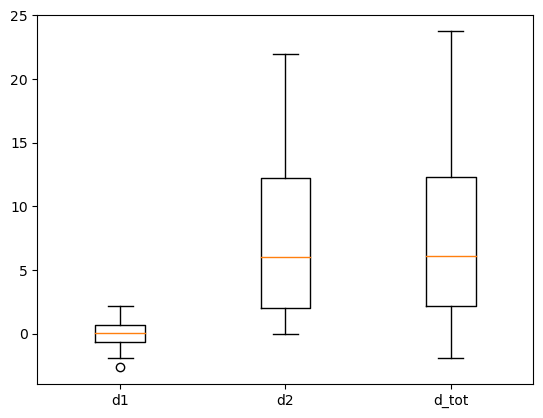

In [195]:
df3=df[['d1', 'd2', 'd_tot']]
plt.boxplot(df3, labels=df3.columns)
plt.show()

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [197]:
csv_in1='mid-p2-1.csv'
csv_in2='mid-p2-2.csv'
s1=pd.read_csv(csv_in1, skiprows=0, header=0)
s2=pd.read_csv(csv_in2, skiprows=0, header=0)
display(s1[s1.duplicated(keep=False)])
s1d=s1.drop_duplicates().reset_index(drop=True)
display(s1d.head())
print(s1d.shape)
display(s2.head())

,h1,h2,h3,h4,h5
1,18,7.0,6.0,k,C
4,10,7.0,20.0,k,E
10,18,7.0,6.0,k,C
15,18,7.0,6.0,k,C
22,18,7.0,6.0,k,C
31,10,7.0,20.0,k,E


,h1,h2,h3,h4,h5
0,2,7.0,5.0,n,E
1,18,7.0,6.0,k,C
2,6,2.0,13.0,f,E
3,11,1.0,9.0,b,E
4,10,7.0,20.0,k,E


(54, 5)


,alpha,spell
0,A,Able
1,B,Baker
2,C,Charlie
3,D,Delta
4,E,Echo


54

In [198]:
print(s1d.isna().sum())
display(s1d[s1d.isna().any(axis=1)])
s1d2=s1d.dropna().reset_index(drop=True)
display(s1d2.head())
s1d2['h4']=s1d2['h4'].replace("f", "fff")
display(s1d2.head())

h1    0
h2    1
h3    3
h4    0
h5    0
dtype: int64


,h1,h2,h3,h4,h5
5,18,NaN,2.0,b,M
22,1,10.0,NaN,b,M
31,8,12.0,NaN,k,E
32,5,10.0,NaN,n,C


,h1,h2,h3,h4,h5
0,2,7.0,5.0,n,E
1,18,7.0,6.0,k,C
2,6,2.0,13.0,f,E
3,11,1.0,9.0,b,E
4,10,7.0,20.0,k,E


,h1,h2,h3,h4,h5
0,2,7.0,5.0,n,E
1,18,7.0,6.0,k,C
2,6,2.0,13.0,fff,E
3,11,1.0,9.0,b,E
4,10,7.0,20.0,k,E


In [199]:
s1d2['h2']=s1d2['h2'].astype('int')
s1d2['h3']=s1d2['h3'].astype('int')

In [200]:
s3=pd.merge(s1d2,s2, how='left', left_on='h5', right_on='alpha')

In [201]:
s3.to_csv('mid-p2-out.csv',index=False,encoding='utf-8-sig')
print(s3.shape)
print(s3.info())

(50, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   h1      50 non-null     int64 
 1   h2      50 non-null     int32 
 2   h3      50 non-null     int32 
 3   h4      50 non-null     object
 4   h5      50 non-null     object
 5   alpha   50 non-null     object
 6   spell   50 non-null     object
dtypes: int32(2), int64(1), object(4)
memory usage: 2.7+ KB
None


In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [203]:
ts=pd.read_csv('mid-p3.csv', skiprows=0, header=0)
display(ts)
print(ts.info())
ts['Date']=pd.to_datetime(ts['Date'])
display(ts)
print(ts.info())

,Date,X0,X1
0,2022-04-01,15.31,-1.94
1,2022-04-03,12.97,-2.06
2,2022-04-04,15.94,5.96
3,2022-04-05,25.87,-16.75
4,2022-04-06,16.51,-31.70
...,...,...,...
95,2022-08-24,57.65,-123.98
96,2022-08-31,57.83,-122.81
97,2022-09-01,48.86,-117.74
98,2022-09-02,46.22,-130.39


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    100 non-null    object 
 1   X0      100 non-null    float64
 2   X1      100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB
None


,Date,X0,X1
0,2022-04-01,15.31,-1.94
1,2022-04-03,12.97,-2.06
2,2022-04-04,15.94,5.96
3,2022-04-05,25.87,-16.75
4,2022-04-06,16.51,-31.70
...,...,...,...
95,2022-08-24,57.65,-123.98
96,2022-08-31,57.83,-122.81
97,2022-09-01,48.86,-117.74
98,2022-09-02,46.22,-130.39


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    100 non-null    datetime64[ns]
 1   X0      100 non-null    float64       
 2   X1      100 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.5 KB
None


In [204]:
ts=ts.set_index('Date')
display(ts)
ts_w=ts.resample('W').mean()
display(ts_w.head())

,X0,X1
Date,,
2022-04-01,15.31,-1.94
2022-04-03,12.97,-2.06
2022-04-04,15.94,5.96
2022-04-05,25.87,-16.75
2022-04-06,16.51,-31.70
...,...,...
2022-08-24,57.65,-123.98
2022-08-31,57.83,-122.81
2022-09-01,48.86,-117.74


,X0,X1
Date,,
2022-04-03,14.140000,-2.000000
2022-04-10,14.034000,-14.542000
2022-04-17,-5.430000,-8.295000
2022-04-24,29.620000,-21.387500
2022-05-01,-11.328333,-35.698333


In [205]:
ts['dow']=ts.index.dayofweek

In [207]:
ts_wday_ave=ts.groupby('dow').mean()

In [210]:
display(ts_wday_ave)

,X0,X1
dow,,
0,28.805714,-69.920714
1,6.533571,-47.457143
2,16.036250,-62.760625
3,13.875556,-64.783889
4,19.513846,-70.936154
5,5.410000,-60.997500
6,17.989231,-56.599231


<BarContainer object of 7 artists>

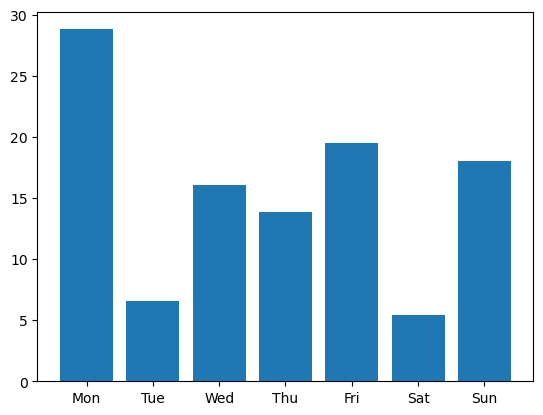

In [214]:
wd=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.bar(wd, ts_wday_ave['X0'])

-47.46

非階層型